### Тепловая карта (heatmap)

Тепловая карта — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

Пример:

Ниже представлена тепловая карта ежедневной активности в Twitter Дональда Трампа и Джо Байдена перед американскими президентскими выборами в 2020 году.

На оси абсцисс отложены минуты, а на оси ординат — часы. Квадраты тепловых карт окрашены в соответствии с тем, сколько твитов было выложено кандидатами в каждую часовую/минутную ячейку за указанный период. Сбоку находится легенда, которая показывает соотношения цвета и количества твитов.

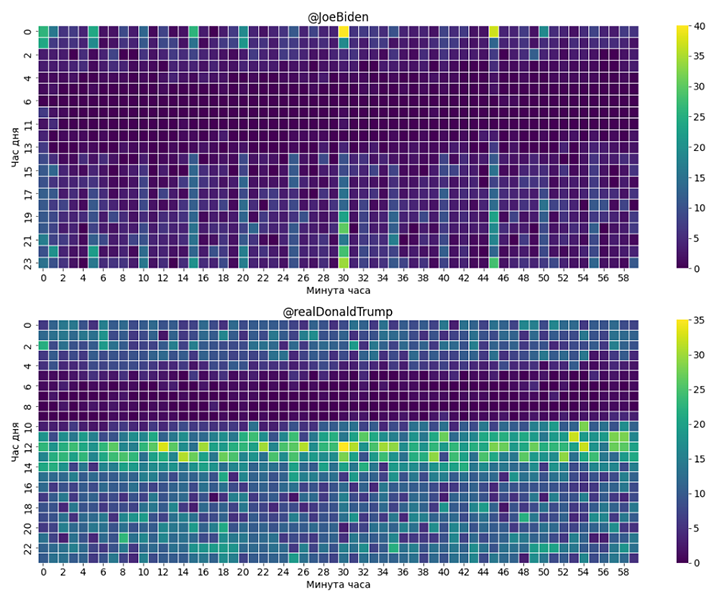

[Источник данных](https://www.kaggle.com/sgwood/biden-and-trump-tweets-201720)

*Тёмная полоса, соответствующая первой половине дня, говорит о том, что оба кандидата не заходят в Twitter по утрам.*

*У Дональда Трампа тепловая карта намного ярче, чем у Джо Байдена, что говорит о том, что Трамп выкладывает твиты намного чаще.*

*Кроме того, можно сказать, что Байден предпочитает посещать соцсети в конце дня — основная масса его твитов сделана после семи часов вечера.*

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');